<center>
<img src="https://raw.githubusercontent.com/FUlyankin/ekenam_grand_research/master/images/cover.png">
</center>


# <center> Иканам гранд рисёрч </center>
## <center>  Часть четвёртая: трэш-рисёрч </center>


Проект **Иканам гранд рисёрч** реализуется [Иканам стьюдентс коммьюнити,](https://vk.com/ikanam)
в частности [вот этим парнем по имени Филипп.](https://vk.com/ppilif) Если вы нашли ошибку или у вас есть предложения, замечания, деньги, слава или женщины, можно ему написать. Весь говнокод, использованный в исследовании распространяется по лицензии [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) Его можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу рисёрча.](https://github.com/FUlyankin/ekenam_grand_research)

# 1. Фотки, картинки и нейронные сети

В этом блокноте мы займёмся обработкой аватарок. Аватарки --- это довольно важная и уникальная штука, из которой можно извлечь много информации. Например, если у человека вовсе нет автара, возможно, что он замкнутый и необщительный. Возможно, это говорит о том, что у него будет более высокая успеваемость. Замкнутые люди обычно довольно много ботают. Если у девушки на аватарке стоит фотка из клуба, видимо, она тусерша и мало ботает. Скорее всего, его успеваемость будет ниже.   **ещё примеров** 

В общем говоря, неплохо было бы понять что именно изображено на аватаре и забрать всё, что мы найдём себе в модель.  План этой тетрадки будет следующим: 

1. Мы поговорим о том что такое нейронные сети и узнаем, что живём в эпоху нейросетевой революции. 
2. Мы обсудим как можно вытаскивать из фоток разную информацию и заодно случайно узнаем как примерно работает фотошоп и удивимся тому, что фотографы каждый день используют не самый тривиальный линал... 
3. Мы снова поговорим о нейросетях. Во время второго захода мы обсудим как нейронки работают с картинками и почему такие сети называются свёрточными. 
4. Мы построим свою первую нейросеть, в которой мы попытаемся предсказать окончит ли человек первый курс чисто по его аватарке.
5. Мы выясним как с помощью нейронок можно извлекать из фоток и других больших объектов всё самое важное и классное.
6. Мы сварим фичи для нашей большой модели. 

# 1. Про нейросети. 

## 1.1 Немного истории 

Сегодня мы все с вами живём в эпоху революции в области машинного обучения. Она началась примерно 10 лет назад и это ни для кого не секрет. Эта революция напрямую связана с третьей (первой успешной) реинкарнацией нейронных сетей.

Несмотря на весь тот хайп, которым сегодня окутаны нейронные сети, это один из старейших алгоритмов машинного обучения. Человечество постоянно пыталось использовать нейросети, но это начало у него получаться совсем недавно. 

Первая модель нейрона была предложена в 1943 году Уорреном Маккалоком и Уолтером Питсом. Уже в 1958 году Фрэнк Розенблатт предложил первую, самую простую нейросеть, которая могла разделять объекты в двухмерном пространстве. 

В 1960-е годы интерес к сеткам был довольно высоким, но по мере появления других, более хороших алгоритмов, угас. В 1990-е интерс к нейронкам снова возрос. Три незвысимые группы учёных одновременно допёрли до алгоритма обрататного распространения ошибки (backpropagation), который позволил обучать нейронки на порядок быстрее (сложность обучения упала с $O(n^2)$ до $O(n)$. Чуть погодя интерес к нейронкам снова угас. 

Сегодня мы снова живём в эпоху нового ренессанса нейросетей. Неожиданно выяснилось, что в отличие от большинства алгоритмов нейросети очень критичны к объёму данных. На маленьких объёмах данных из-за своей сложной структуры они очень плохо работают. Вместо того, чтобы выявить закономерность и обобщить её, они просто-напросто запоминают выборки. К сегодняшнему дню человечество подкопило данных и продолжает накапливать экспоненциальными темпами. 

На огромных объёмах данных нейросети работают очень даже хорошо. Более того, оказалось, что нейросети способны решать такие задачи, которые раньше считались нерешаемыми. Например, они умеют подписывать изображения, переносить стили художников на другие изображения и многое другое. В блажайшие годы сфера применения нейросетей будет только расширяться. Область развивается настолько динамично, что научные статьи за год успевают устареть. 

Несмотря на всю эту мощь, на современном этапе развития существует ряд серьёзных проблем, с которыми человечеству придётся разбираться.

Например, в январе 2017 года был проведён следующий эксперимент. Учёные мужи взяли огромную выборку из картинок. Для каждой картинки было подписано что именно на ней изображено. Все картинки и правильные ответы перемешали. Панда с одной картинки стала поездом, а панда с другой картики стала львом. Любые закономерности, которые можно было бы использовать для распознавания картинок, исчезли. После на эти данные были натравлены нейросетки. Оказалось, что все сетки достигают на огромной обучающей выборке нулевой ошибки, то есть просто-напросто запоминают выборку и никак не сообщают нам о том, что никакой закономерности в данных не было. При всём этом, нейросеть уверенно выдавала прогнозы для новых картинок и, конечно же, её точность была сравнима со случайным угадыванием. 

Другой открытой проблемой является то, что нейросетки принимают какие-то решения с какой-то точностью, но все эти решения неинтерпретируемы. Люди, в свою очередь, хотели бы понимать почему компьютер принял то или иное решение. Когда мы распознаём картинки, это не так критично, но когда речь идёт о медицинском диагнозе или о поведении на дороге самоуправляемой машины, нам хотелось бы понимать почему сетка приняла именно такое решение и насколько она в нём уверена. Если уверенность машины в своём поведении падает, надо переходить на ручное управление. На современном этапе своего развития, сетки не сообщают о том насколько они уверены в своём решении.  

Более того, работу нейросетей можно дестабилизировать. Например, если нарисовать на дорожном знаке маркером небольшую загогулину, нейросеть, вшитая в нашу машину, может неожиданно решить, что это вовсе не дорожный знак, а олень. 

Сегодня в направлении решения этих проблем идёт активная работа. Перспективной кажется ещё более древняя нежели нейросети идея, которая была предложена Томасом Байесом в далеком 18 веке. Байесовская статистика поднобно нейронным сетям переживает сегодня серьёзный ренессанс. Байесовские методы как и нейросети требуют огромных вычислительных ресурсов. Весь этот ренессанс и новые крутые технологии стали возможны благодаря новым компьютерам, появившимся у людей только в начале нового тысячелетия. Байесовские методы позволяют воспитать целый континнум нейронных сетей. Сделав выборку сетей из этого континума, можно оценить то насколько сетки уверены в своём решении. Такую технологию люди придум

но о ней мы поговорим в другой раз. Наверное, отдельно стоит отметить, что и нейронки и байесовские методы требуют огромных вычислительных ресурсов, которые появились у человечества только в начале нового тысячилетия.  

Ну и, наверное, последнее, что стоит сказать в этом небольшом экскурсе, это то, что нейросеть это далеко не искуственный интеллект. В основе нейронок лежит самая простая модель нейрона. Человеческий мозг устроен на порядок сложнее. Чуть ниже станет понятно, что нейросеть не особо сильно отличается от обычной линейной регрессии и все слухи о том, что возникновение скайнет возможно уже завтра, всего лишь слухи. До настоящей скайнет человечеству ещё далеко. Но, в прочем, подробнее об этой стороне вопроса можно узнать из очень крутой книги Педро Домингоса, [Верховный Алгоритм.](https://www.ozon.ru/context/detail/id/136780904/)

### 1.2 Как работают нейронки 















В принципе это вся информация, которую я хотел бы здесь описать. Не очень хочется грузить читателя моего небольшого научпопа излишними деталями. Детали оставим для курсов по машинному обучению. Тем не менее, если у вас возникло желание чуть более подробно вникнуть в суть вопроса, имеет смысл глянуть вот эту [лекцию из малого ШАДа,](https://habrahabr.ru/company/yandex/blog/307260/) прочитанную школьникам. 

## 2. Обработка фоток

Информация, которую можно было бы использовать в моделях, бывает очень разной. Например, в модель спокойно можно добавить фичи, созданные на основе фоток. Обычно это делается с помощью нейронок. Мы в этом скрипте попробуем для начала сварить несколько разных фичей с помощью разных фильтров. После, подобно другим исследователям, мы сварим несколько фичей с помощью нейронок, а заодно поймём почему так обычно делают. 

Для работы с фото мы будем использовать пакет `cv2`. Для его установки нужно прописать в консоли `pip3 install opencv-python`.  Для него написана довольно хорошая и понятная [документация.](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) 

In [1]:
import cv2

In [2]:
import pandas as pd    # Пакет для работы с таблицами
import numpy as np     # Пакет для работы с векторами и матрицами
import pickle          # Пакет для сохранения и подгрузки данных 
import urllib          # Пакет для чтения ссылок
   
# Пакет для красивых циклов. При желании его можно отключить и удалить из всех циклов 
# команду tqdm_notebook.
from tqdm import tqdm_notebook

import cv2 # Пакет для работы с фоточками 

from matplotlib import pyplot as plt  # Графики 
%matplotlib inline

Подгружаем вектор из фотографий. По каждому фото у нас есть информация о том как давно она залита вк, какая у неё высота, ширина, ссылка, по каким координатам обрезана фотка. 

In [3]:
with open('../vk_data/vk_data_photos_v26-11-17', 'rb') as f:
    photo = pickle.load(f)

photo[10]

{'ava_created': 1506862194,
 'ava_height': 2160,
 'ava_rect': {'x': 0.0, 'x2': 100.0, 'y': 0.0, 'y2': 100.0},
 'ava_url': 'https://pp.userapi.com/c840637/v840637809/c54a/2MhQZ4Vhl4I.jpg',
 'ava_width': 2353,
 'uid': 133904420}

Возьмём одну из ссылок, подгрузим фотку и попробуем с ней поколдовать. Для подгрузки фоток нагуглим функцию, которая написана ниже. 

(-0.5, 603.5, 402.5, -0.5)

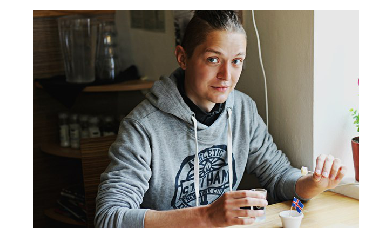

In [4]:
url = photo[-190]['ava_url']

def url_to_image(url):
    resp = urllib.request.urlopen(url)                        # Открываем фото
    image = np.asarray(bytearray(resp.read()), dtype="uint8") # Распаковываем его в матрицу
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)             # Конвертируем в формат для нашего пакета   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)            # Выбираем нужную цветовую схему 
    return image

# Загружаем фотку и смотрим как она выглядит 
img = url_to_image(url)

plt.imshow(img)
plt.axis("off")

Отлично, фото в наших руках. На самом деле каждая картинка это набор пикселей. Если мы попросим питон показать нам картинку, он покажет матрицу из чисел.  Каждому пикселю в этой матрице соответствует число. Это число сообщает нам о том насколько этот пиксель яркий. Яркость измеряется по шкале от $0$ до $255$.

In [5]:
img[0][:5]  # цвета верхник пикселей по шкале RGB

array([[77, 49, 25],
       [75, 47, 23],
       [73, 45, 21],
       [77, 47, 23],
       [79, 49, 25]], dtype=uint8)

Цветные картинки представляются в виде [тензора,](https://www.wikiwand.com/ru/%D0%A2%D0%B5%D0%BD%D0%B7%D0%BE%D1%80) то есть матрицы из матриц. Любой цвет можно получить, смешав в какой-то пропорции красный, зелёный и синий цвета. В связи с этим каждый пиксель обычно характеризуют тремя цифрами: (насколько пиксель красный, насколько пиксель зелёный, насколько пиксель синий). Такой формат хранения картинки называется [RGB-форматом.](https://www.wikiwand.com/ru/RGB)

In [6]:
# Видим, что у нас картинка размера 87 на 130 пикселей и описывается 3 матрицами (одна на каждый цвет)
img.shape 

(403, 604, 3)

Все действия по редактированию картинки сводятся к математике. Чтобы осветлить картинку, нужно прибавить к каждому пикселю какое-то число. Для этого используют функцию `cv2.add`. В случае прибавления очень большого числа, она накопит яркость 255 и не пробьёт этот порог. Мы добвим 30 пунктов только к красной координате. Если захочется добавить 30 пунктов ко всем трём координатам, rкод придётся немнго модернизировать. 

(-0.5, 603.5, 402.5, -0.5)

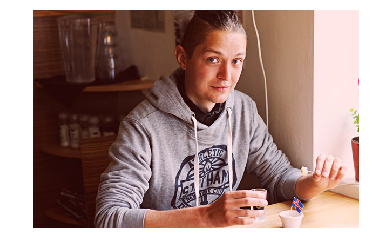

In [7]:
img_1 = cv2.add(img,30)
plt.imshow(img_1)
plt.axis("off")

Умножение каждого пикселя на какое-то число увеличит контраст. Также проделаем этот фокус только с красной координатой. 

(-0.5, 603.5, 402.5, -0.5)

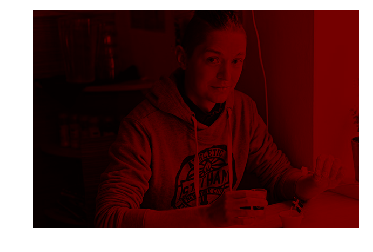

In [8]:
img_1 = cv2.multiply(img,0.5) # повышаем контраст
plt.imshow(img_1)
plt.axis("off")

Можно посмотреть на то как распределены на картинке пиксели различной яркости.

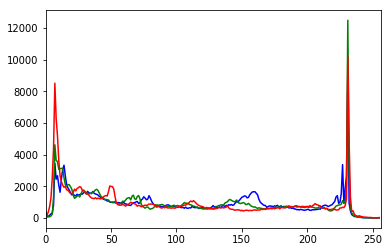

In [9]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Чуть позже мы обязательно как следует поиграемся с пикселями с нашей картинки. Сейчас давайте скачаем по ссылкам все фотки и начнём создавать датафрэйм.

In [10]:
df_ph = pd.DataFrame( )

# Будем оставлять информацию по максимуму 
P = [ ] # Заодно собираем матрицу из фоток
for ph in tqdm_notebook(photo):
    try:
        P.append(url_to_image(ph['ava_url']))  # В матрицу собираем картинки  
        p1 = 1
        rec = ph['ava_rect']
        rec1,rec2,rec3,rec4 = rec['x'],rec['x2'],rec['y'],rec['y2']
    except:
        P.append(np.zeros((604,604,3)))  # Если нет аватарки, заполним её нулями
        p1 = 0
        rec1,rec2,rec3,rec4 = np.nan,np.nan,np.nan,np.nan
    # Всё остальное кладём в табличку
    df_ph = df_ph.append(pd.DataFrame([ph['uid'],p1,ph['ava_created'],ph['ava_height'],ph['ava_width'],
                                                        rec1,rec2,rec3,rec4]).T,ignore_index = True)
    
df_ph.columns = ['uid','exist_photo','ava_created','ava_height',
                                     'ava_width','rec_x1','rec_x2','rec_y1','rec_y2']

df_ph['photo'] = P

HBox(children=(IntProgress(value=0, max=707), HTML(value='')))

Сохраним словарик из аватарок для визуализаций в исследовании лайков. 

In [15]:
user_ph_dct = {int(uid) : P for uid,P in zip(df_ph.uid.get_values(), P)}

with open('../vk_data/vk_user_photo_dict', 'wb') as f:
    pickle.dump(user_ph_dct, f)

Нарисуем несколько рандомных аватарок 

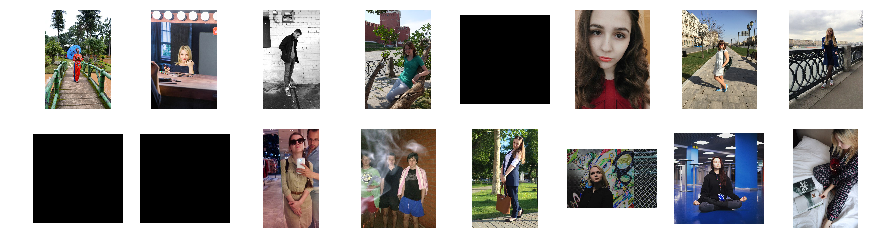

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(P))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(P[random_index])

Перейдём к фишкам, которые используют под капотом все фоторедакторы, а также свёрточные нейронные сетки. 

## 2. Свёртка

Свёртка это операция, которая превращает набор одних пикселей в другие. Обычно она осущствляется с помощью ядра свёртки, матрицы произвольного размера (обычно 3х3). Центральный элемент такой матрицы называется якорем свёртки. Он применяется к центральному пикселю. 

Работает свёртка очень просто. При вычислении нового значения выбранного пикселя изображения, ядро свёртки прикладывается своим центром к этому пикселю. Далее, вычисляется сумма произведений значений пикселей изображения на значения, накрывшего данный пиксель элемента ядра. Полученная сумма и является новым значением выбранного пикселя.

Используя матрицы с разными коэффициентами можно получать раные эффекты. 

Попробуем ухудшить качество изображения. В этом нам поможет следующее ядро размера 3 на 3.

$$ K = \frac{1}{9} \cdot \begin{pmatrix}
1 & 1 & 1  \\
1 & 1 & 1  \\         
1 & 1 & 1 
\end{pmatrix} $$

Оно берёт пиксель в каждом квадрате размера 3 на 3 и заменяет его на арифмитическое среднее всех пикселей. Таким образом размерность картинки и её качество падают.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

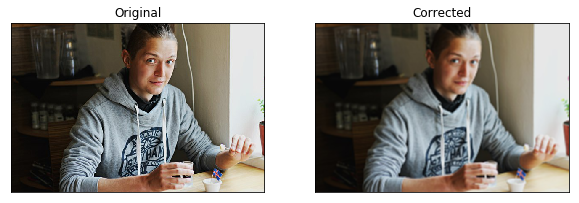

In [12]:
plt.figure(figsize=(10,10))

kernel = np.ones((5,5),np.float32)/25  # Создали в нумпай матрицу из 1/25 размера 5 на 5
dst = cv2.filter2D(img,-1,kernel)      # применили матрицу к нашей картинке 

plt.subplot(121),plt.imshow(img,),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Corrected')
plt.xticks([]), plt.yticks([])

Попробуем применить другие ядра. Например, ядро для сглаживания.

$$ \begin{pmatrix}
0.1 & 0.1 & 0.1  \\
0.1 & 0.1 & 0.1 \\         
0.1 & 0.1 & 0.1 
\end{pmatrix} $$

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

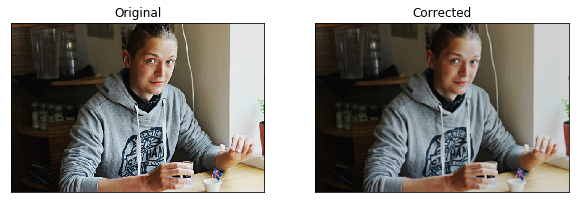

In [13]:
plt.figure(figsize=(10,10))

kernel = 0.1*np.ones((3,3),np.float32)
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img,),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Corrected')
plt.xticks([]), plt.yticks([])

Ядро для увеличения чёткости. Обратите внимание на большое значение якоря.

$$ \begin{pmatrix}
0.1 & 0.1 & 0.1  \\
0.1 & 2 & 0.1 \\         
0.1 & 0.1 & 0.1 
\end{pmatrix} $$

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

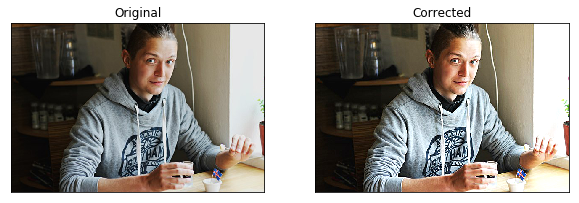

In [14]:
plt.figure(figsize=(10,10))

kernel = -0.1*np.ones((3,3),np.float32)
kernel[1,1]=2
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img,),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Corrected')
plt.xticks([]), plt.yticks([])

Забавно, что при повторном применении фильтра для увеличения чёткости, картинка покрывается шумом.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

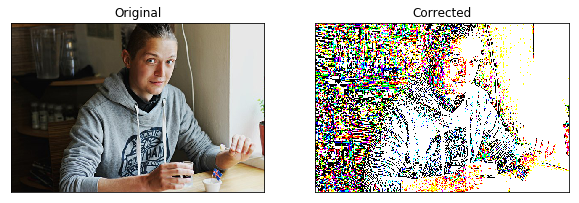

In [15]:
plt.figure(figsize=(10,10))

kernel = -0.1*np.ones((3,3),np.float32)
kernel[1,1]=2
dst = cv2.filter2D(img,-1,kernel)
# Повторяем повторно фильтр 2 раза 
for i in range(20):
    dst = cv2.filter2D(dst,-1,kernel)

plt.subplot(121),plt.imshow(img,),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Corrected')
plt.xticks([]), plt.yticks([])

Гауссовский фильтр хорошо удаляет шум.  Чуствуете иронию? Нормальное распределение пригождается фотошоперам в жизни на ежедневной основе! Правда они даже не знают об этом...

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

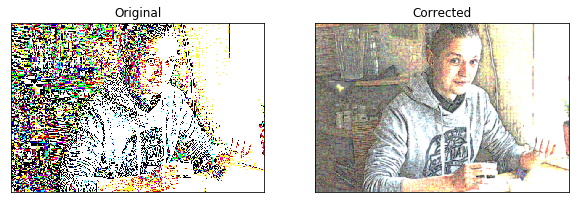

In [16]:
plt.figure(figsize=(10,10))

blur_0 = cv2.GaussianBlur(dst,(5,5),0)
plt.subplot(121),plt.imshow(dst),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur_0),plt.title('Corrected')
plt.xticks([]), plt.yticks([])

Ядра бывают очень разными. Например, вы можете попробовать использовать следующие: 

* Ядро для увеличения яркости. 

$$ \begin{pmatrix}
-0.1 & 0.2 & -0.1  \\
0.2 & 3 & 0.2 \\         
-0.1 & 0.2 & -0.1 
\end{pmatrix} $$

* Ядро для затемнения. 

$$ \begin{pmatrix}
-0.1 & 0.1 & -0.1  \\
 0.1 & 0.5 & 0.1 \\         
-0.1 & 0.1 & -0.1 
\end{pmatrix} $$

* Ядро, которое ничего не делает 

$$ \begin{pmatrix}
0 & 0 & 0  \\
0 & 1 & 0 \\         
0 & 0 & 0 
\end{pmatrix} $$

* Ядро, которое сдвигает картинку

$$ \begin{pmatrix}
1 & 0 & 100  \\
0 & 1 & 50     
\end{pmatrix} $$

* Ядро для пофорота картинки на угол $\phi$ 

$$ \begin{pmatrix}
\cos\phi & -sin\phi  \\
\sin\phi & \cos\phi
\end{pmatrix} $$

* Эрозия и наращивание. Выбираем пиксель с максимальной или минимальной интенсивностью из окрестности.  Наращиваение приводит к увеличению ярких объектов, а эрозия к увеличению тёмных. Наращивание может быть использовано для увеличения бликов ярких изображений. Обычно эрозия имеет округлую форму и выглядит, например, так:

$$ \begin{pmatrix}
0 & 0 & 1 & 0 & 0  \\
0 & 1 & 1 & 1 & 0  \\         
1 & 1 & 1 & 1 & 1  \\
0 & 1 & 1 & 1 & 0  \\        
0 & 0 & 1 & 0 & 0
\end{pmatrix} $$


Абсолютно любая матрица задаёт какое-то преобразование линейного пространства. В данном случае нашей фотографии. При хорошем знании линала, вы можете придумать самые безумные ядра. Попробуйте! 

In [17]:
# Ваш код для игры в фильры 

## 3. Углубляемся в свёртку

Попробуйте угадать, что делают следующие два фильтра. 

$$ \begin{pmatrix}
-1 & -1 & -1  \\
0 & 0 & 0 \\         
1 & 1 & 1 
\end{pmatrix}  $$

$$ \begin{pmatrix}
-1 & 0 & 1  \\
-1 & 0 & 1 \\         
-1 & 0 & 1 
\end{pmatrix} $$

Внимание, ответ. Первый фильтр пытается понять насколько резко изменяется яркость картинки по вертикали и находит вертикальные границы. Второй фильтр пытается понять насколько резко изменяется картинка по горизонтали и находит горизонтальные границы. Если просуммировать применение этих фильтров, можно получить чёткое очертание границ картинки. Чем больше в матрицах цифры, тем более резкую разницу находят ядра. 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

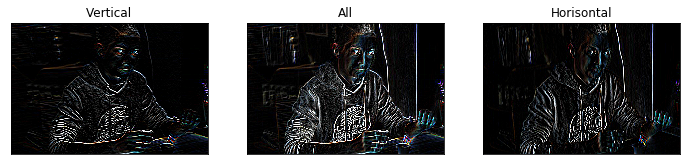

In [18]:
plt.figure(figsize=(12,12))

kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
kernel2 = kernel1.T

dst1 = cv2.filter2D(img,-1,kernel1)
dst2 = cv2.filter2D(img,-1,kernel2)
gr1 = cv2.add(dst1,dst2)

plt.subplot(131),plt.imshow(dst1),plt.title('Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gr1),plt.title('All')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dst2),plt.title('Horisontal')
plt.xticks([]), plt.yticks([])

Если сначала обработать картинку ядром для повышения чёткости, а после применить фильр для поиска границ, они детектируются более чётко. 

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

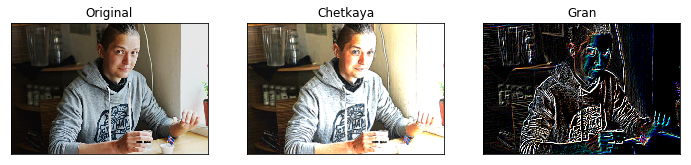

In [19]:
plt.figure(figsize=(12,12))

kernel = -0.1*np.ones((3,3),np.float32)
kernel[1,1]=2
dst = cv2.filter2D(img,-1,kernel)
# Забавно, что при повторном применении этого Ядра картинка покрывается шумом! 
for i in range(3):
    dst = cv2.filter2D(dst,-1,kernel)
    
# Можно почистить картинку от шума 
dst = cv2.GaussianBlur(dst,(5,5),0)

kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
kernel2 = kernel1.T

dst1 = cv2.filter2D(dst,-1,kernel1)
dst2 = cv2.filter2D(dst,-1,kernel2)
gr2 = cv2.add(dst1,dst2)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Chetkaya')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gr2),plt.title('Gran')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

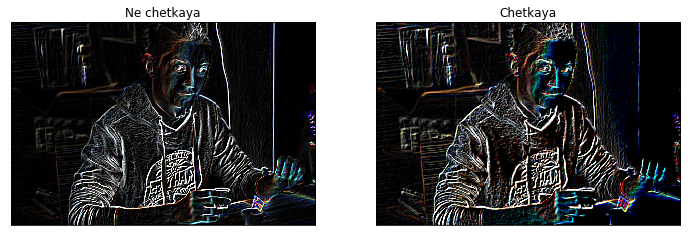

In [20]:
plt.figure(figsize=(12,12))

plt.subplot(121),plt.imshow(gr1),plt.title('Ne chetkaya')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gr2),plt.title('Chetkaya')
plt.xticks([]), plt.yticks([])

Вроде бы граница получилась более чёткой. Внутри пакета есть своя функция для выделения границы. Он работает более агрессивно нежели наше ядро.

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

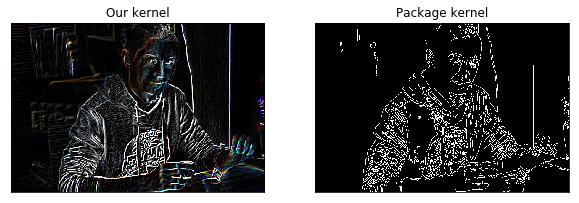

In [21]:
plt.figure(figsize=(10,10))

kernel1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],np.float32)
kernel2 = kernel1.T

dst1 = cv2.filter2D(img,-1,kernel1)
dst2 = cv2.filter2D(img,-1,kernel2)
my_gr = cv2.add(dst1,dst2)

# Пакетная функция:
its_gr = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(my_gr),plt.title('Our kernel')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(its_gr,cmap='gray'),plt.title('Package kernel')
plt.xticks([]), plt.yticks([])

Вообще, такое ядро задаёт градиент картики. Можно побаловаться с более крутыми градиентами, в том числе диагональными.

$$ \begin{pmatrix}
0 & 1 & 2  \\
-1 & 0 & 1 \\         
-2 & -1 & 0 
\end{pmatrix} $$

Как уже догадался читатель, можно придумать фильры не только для поиска границ, но и для поиска других различных закономерностей, которые есть на картинке. 

Представим себе на секунду славный дивный мир, в котором бывают картинки только двух типов: с прямыми слэшами и с обратными (/ \). При этом, эти слэши могут быть нарисованы на картинке где угодно. Пусть у нас есть две картинки. На одной из них слэш нарисован внизу справа, на второй сверху слева. Пройдёмся по нашим картинкам специальным ядром, которое ищет обратные слэши. После свёртки, мы получим на выходе две уменьшившиеся в размерах картинки, в каждой из которых будет фигурировать цифра два, как раз отвечающая за найденный обратный слэш.

<img align="center" src="photo_1.png" height="500" width="500"> 

Если точно такое же ядро натравить на картинку без обратного слэша, оно не выдаст нам на выход никакой двойки. 

<img align="center" src="photo_2.png" height="600" width="600"> 

Получаем простейший классификатор картинок с слэшами. 

1. Проходимся по картинке ядром. 
2. Находим в итоговой матрице максимальный элемент.
3. Если это двойка, на картинке изображён слэш. Если это единица, на картинке обратный слэш.

Обратите внимание, что работа этого классификатора не зависит от того, где именно на картинке находится слэш. Именно так свёрточные нейронные сети и работают с картинками. Конечно же, в реальности закономерности на картинках на порядок сложнее. При этом, мы даже не знаем какими именно могут быть эти закономерности. Для того, чтобы их искать, в нейронную сетку добавляются ядра с неспецифицированными параметрами.

$$ \begin{pmatrix}
w_1 & w_2 & w_3  \\
w_4 & w_5 & w_6 \\         
w_7 & w_8 & w_9 
\end{pmatrix} $$

Слои, на которых находятся эти ядра называются свёрточными. Параметры подбираются в ходе обучения нейронной сети по реальным данным и отражают в себе какие-то закономерности, найденные во время обучения на картинках. Представим, что наша нейронная сеть должна уметь распознавать лица. Добавим в неё несколько свёрточных слоёв. 

Первый слой будет находить простейшие элементы, такие как слэши, прямые чёрточки и извилистые чёрточки. Второй слой будет конструировать из элементов, найденных на первом слое, ещё более сложные штуки. В данном случае окружности и крестики. Третий слой будет конструировать из объектов, найденных на втором слое ещё более сложные объекты. Таким образом, мы, слой за слоем, будем собирать всё более и более сложные объекты до тех пор, пока не дойдём до лица. 

<img align="center" src="photo_3.png" height="600" width="600"> 

Обычно закономерности, которые находит свёрточная сеть сложно интерпретируемы. Тем не менее, мы можем забрать те закономерности, которые нашла нейросетка и использовать их в качестве регрессоров в какой-то более интерпретируемой модели.

Например, пусть перед нами стоит задача оценить стоимость поездки на такси в зависимости от времени суток, расстояния и кучи других параметров. Представим, что существует закон, который обязывает пассажиров такси фотографировать своего водителя перед каждой поездкой и после каждой поездки. С помощью нейронок мы могли бы извлечь из этих фотографий для нашей интерпретируемой линейной регрессии дополнительные квазиинтерпретируемые фичи. Полюбак нейросеть вытащит фичи, которые будет отвечать за то, какая у водителя национальность, возраст, черты лица и т.п. Вполне может оказаться, что какие-нибудь редкие армяне-альбиносы гоняют быстрее всех. Было бы забавно посмотреть на город, где был бы принят такой закон. Молодая дама вызывает такси, приезжает водитель, она фоткает его. Нейросеть в её телефоне определяет особенности этого водителя и выясняет насколько дорого будет стоить поездка, и дама отказывается ехать под предлогом того, что нейросеть показывает очень большую прогнозную стоимость. Абсурд? Ничего подобного!

Конечно же нейросети работают немножечко сложнее. Конечно же в них намного больше различных слоёв и для каждой, решаемой с помощью них задачи, существует огромная куча тонкостей. Например, отдельный вопрос состоит в том как должен вести себя алгоритм свёртки на краях изображения. Выше мы применили ядро к картинке со слэшем. Это уменьшило её с размера $4 \times 4$ до размера $3 \times 3$. Обычно для решения этой проблемы, на краях добавляются дополнительные ряды из пикселей, заполненных нулями так, чтобы размер картинки при свёртке не менялся. 

Размер картинок обычно умешьшают на отдельных слоях с помощью штуки, которую называют пулинг. Из всех квадратов размера $2 \times 2$ либо берётся максимальный элемент, либо среднее. Это позволяет уменьшить изображение. Будем забивать себе голову всякими тонкостями постепенно и перейдём чуть ближе к делу. Напишем несколько нейросеток. 

## 3. Нейросеть номер один отчисление человека по его аватару 

### 3.1 Подготовка картинок и датасета 

**Задача:** спрогнозировать по аватарке закончит ли человек эконом. Подгрузим данные о том кто закончил первый курс. 

In [96]:
# файлы, в которых лежат id и другие размеченые данные называются Total_20XX 
# Заведем вектор со всеми годами, которые есть у нас в распоряжении
file_names = ['2012','2013','2014','2015','2016','2017']
tables = [ ] # Вектор, куда мы будем записывать все уиды  (user id)

# Проходимся по всем файлам и забираем uid
for file in file_names: 
    cur_df = pd.read_excel('../total_razm/Total_' + file + '.xlsx') # В этой папке файлы...
    tables.append(cur_df)
    
df1 = tables[0][['firstname','lastname','kurs_luiza','uids']]
df2 = tables[1][['firstname','lastname','kurs_sahsa','uids']]
df3 = tables[2][['firstname','lastname','kurs_ilia','uids']]
df4 = tables[3][['firstname','lastname','kurs_misha','uids']]
df5 = tables[4][['firstname','lastname','kurs_alena','uids']]

df1.columns = ['firstname','lastname','kurs','uid']
df2.columns = ['firstname','lastname','kurs','uid']
df3.columns = ['firstname','lastname','kurs','uid']
df4.columns = ['firstname','lastname','kurs','uid']
df5.columns = ['firstname','lastname','kurs','uid']

all_df = pd.concat([df1,df2,df3,df4,df5])
print(all_df.shape)
all_df = all_df.drop_duplicates(subset=['firstname','uid'],keep='first')
print(all_df.shape)
all_df = all_df.dropna(subset = ['uid'])
print(all_df.shape)
all_df['target'] = [1 if item > 1 else 0 for item in all_df.kurs]
all_df.head( )

(381, 4)
(377, 4)
(358, 4)


,firstname,lastname,kurs,uid,target
0,Данильченко,Леонид,5,11752069.0,1
1,Лисовская,Людмила,5,20276920.0,1
2,Кочеткова,Полина,5,154585217.0,1
3,Канаева,Дельгир,1,135009313.0,0
4,Климова,Екатерина,2,103720469.0,1


In [102]:
dff = pd.merge(df_ph,all_df,on='uid',how='inner')
print(dff.shape)
dff.head( )

(358, 14)


,uid,exist_photo,ava_created,ava_height,ava_width,rec_x1,rec_x2,rec_y1,rec_y2,photo,firstname,lastname,kurs,target
0,22261760.0,1.0,1.460399e+09,1221.0,1221.0,9.99,89.93,9.99,89.93,"[[[72, 102, 126], [96, 124, 146], [163, 189, 2...",Кулак,Ксения,3,1
1,137312267.0,1.0,1.504355e+09,960.0,960.0,0.00,100.00,0.00,100.00,"[[[189, 218, 232], [191, 220, 236], [193, 222,...",Скибенко,Светлана,1,0
2,201445391.0,1.0,1.488466e+09,853.0,1280.0,0.00,100.00,0.00,99.88,"[[[125, 140, 119], [118, 133, 112], [123, 138,...",Сарбашева,Аруна,1,0
3,161292310.0,1.0,1.506006e+09,720.0,636.0,0.00,100.00,0.00,100.00,"[[[244, 246, 243], [244, 246, 243], [245, 245,...",Селищева,Анна,2,1
4,37662759.0,1.0,1.511655e+09,1706.0,2560.0,0.00,76.14,22.33,98.48,"[[[13, 19, 19], [20, 15, 19], [24, 15, 20], [2...",Касьянова,Ксения,3,1


In [143]:
cnn_df = dff[dff.exist_photo == 1][['firstname','lastname','photo','target']].reset_index(drop=True)
cnn_df.shape

(319, 4)

In [144]:
cnn_df.target.value_counts()

1    236
0     83
Name: target, dtype: int64

Отлично! Мы собрали данные для построения сетки. К сожалению, в нашем распоряжении есть всего-лишь 319 наблюдений. Нейросеть получется чуть более, чем отстойной. Но мы всё-равно её построим.

Пл подгруженными аватарками есть ряд проблем. Первая из них: картинки разного размера. 

In [111]:
print('Минимум по горизонтали:', min([item.shape[0] for item in cnn_df.photo]))
print('Минимум по вертикали:',min([item.shape[1] for item in cnn_df.photo]))

[item.shape for item in cnn_df.photo][:5]

Минимум по горизонтали: 225
Минимум по вертикали: 177


[(604, 604, 3), (604, 604, 3), (403, 604, 3), (604, 534, 3), (403, 604, 3)]

Наверное, по тому как фотки обрезали сами авторы фоток, особого смысла нет. Попробуем два разных варианта по работе с фотками. При первом варианте, будем просто-нипросто делать для фоток `reshape` внутренними средствами `cv2`. Фотки, при таком подходе будут искажатся. 

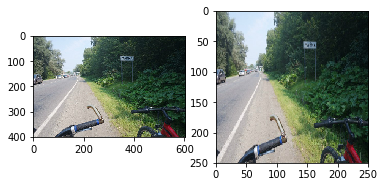

In [130]:
# Мы будем обрезать картинки и преобразовывать их к размеру IMG_SIZE x IMG_SIZE
IMG_SIZE = 250

plt.subplot(1,2,1)
plt.imshow(cnn_df.photo[2])

plt.subplot(1,2,2)
plt.imshow(cv2.resize(cnn_df.photo[2], (IMG_SIZE, IMG_SIZE)))

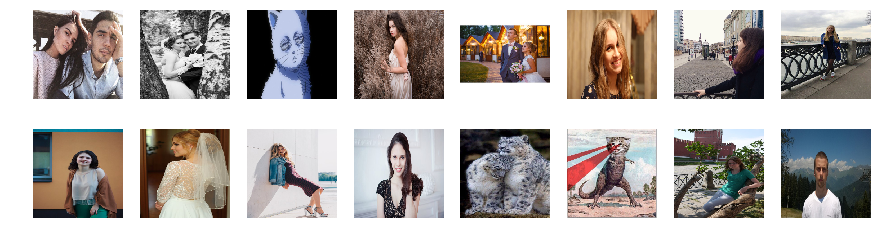

In [146]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(cnn_df.photo))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(cv2.resize(cnn_df.photo[random_index], (IMG_SIZE, IMG_SIZE)))

При втором подходе, будем сначала обрезать фотки до квадратного вида, а уже потом делать reshape. 

In [163]:
def image_center_crop(img):
    w = img.shape[0]
    h = img.shape[1]
    if w > h :
        cropped_img = img[(w-h)//2:w-(w-h)//2,:,:]
    elif w < h:
        cropped_img = img[:,(h-w)//2:h-(h-w)//2,:]
    else:
        cropped_img = img
    # Решейп картинки 
    img = cv2.resize(cropped_img, (IMG_SIZE, IMG_SIZE))
    return img

def crop_vis(img):
    crop_img = image_center_crop(img)
    print('Original shape:', img.shape, '\n', 'crop shape:', crop_img.shape)
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,3)
    plt.title("Crop")
    plt.imshow(crop_img)
    
cnn_df['photo_1'] = [image_center_crop(item) for item in cnn_df.photo]

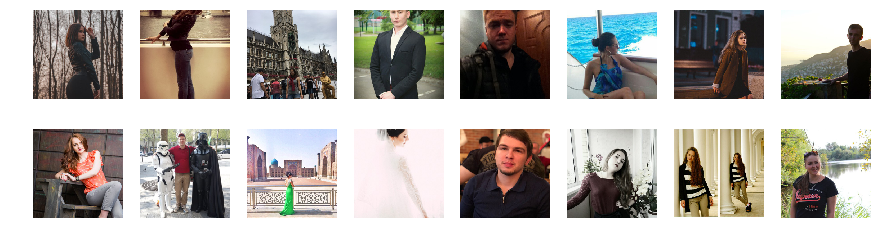

In [148]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(cnn_df.photo))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(image_center_crop(cnn_df.photo[random_index]))

### 3.2 Обучаем нейронную сетку

про керас и то что можно собирать сети как конструктор лего.

In [154]:
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, InputLayer
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

In [213]:
X_train, X_test, y_train, y_test = train_test_split(cnn_df.photo_1,cnn_df.target, test_size=0.2, random_state=42,
                                                       stratify=cnn_df.target)

y_train = keras.utils.to_categorical(y_train,2)
y_test = keras.utils.to_categorical(y_test,2)

X_train = np.array([list(item) for item in X_train])
X_test = np.array([list(item) for item in X_test])

X_train = X_train/255
X_test = X_test/255

In [214]:
X_train.shape

(255, 250, 250, 3)

In [225]:
model = Sequential()
# Для первого слоя важно не забыть указать "input_shape"
model.add(InputLayer((IMG_SIZE, IMG_SIZE, 3))) # Входной слой размерность будет 28 28 1 
model.add(Flatten())
model.add(Dense(2))
model.add(LeakyReLU(0.1))    
model.add(Dropout(0.5))                 
model.add(Dense(2))  # Последний слой с нейронами для каждого класса 
model.add(Activation("softmax"))  # Итоговые вероятности

In [174]:

model.add(Conv2D(16, kernel_size=(3, 3),padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32, kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D( pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(0.1))    
model.add(Conv2D(64, kernel_size=(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D( pool_size=(2,2)))
model.add(Dropout(0.25))


In [226]:
# Взглянем на нашу модель
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 187500)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 375002    
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 2)                 0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 6         
_________________________________________________________________
activation_15 (Activation)   (None, 2)                 0         
Total para

In [227]:
# Выбираем для модели оптимизатор и собираем её
model.compile(
    loss='binary_crossentropy',  # Кросс энтропия обычно используется как функция потерь для 
                                      # задачи многоклассовой классификации
    optimizer=keras.optimizers.adamax(lr=0.1),  # SGD наш оптимизатор 
    metrics=['accuracy']  # Будем в ходе обучения запоминать точность прогнозов
)

In [228]:
# Мы готовы к обучению 
hist = model.fit(
    X_train, y_train,    # Данные
    epochs =100,         # Сколько полных проходов по данным
    validation_data=(X_test, y_test)
)

Train on 255 samples, validate on 64 samples
Epoch 1/100
255/255 [==============================] - 1s 5ms/step - loss: 2.6605 - acc: 0.7078 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 2/100
255/255 [==============================] - 0s 2ms/step - loss: 3.2251 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 3/100
255/255 [==============================] - 0s 2ms/step - loss: 3.3405 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 4/100
255/255 [==============================] - 0s 2ms/step - loss: 3.4554 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 5/100
255/255 [==============================] - 0s 2ms/step - loss: 2.9918 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 6/100
255/255 [==============================] - 0s 2ms/step - loss: 3.3966 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 7/100
255/255 [==============================] - 0s 2ms/step - loss: 3.1744 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 8/100
255/255 [===

Epoch 62/100
255/255 [==============================] - 0s 2ms/step - loss: 3.6951 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 63/100
255/255 [==============================] - 0s 2ms/step - loss: 3.3394 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 64/100
255/255 [==============================] - 0s 2ms/step - loss: 3.2907 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 65/100
255/255 [==============================] - 1s 2ms/step - loss: 3.3418 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 66/100
255/255 [==============================] - 1s 2ms/step - loss: 3.2726 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 67/100
255/255 [==============================] - 0s 2ms/step - loss: 3.3501 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 68/100
255/255 [==============================] - 0s 2ms/step - loss: 3.1690 - acc: 0.7412 - val_loss: 4.2580 - val_acc: 0.7344
Epoch 69/100
255/255 [==============================] - 0s 2ms

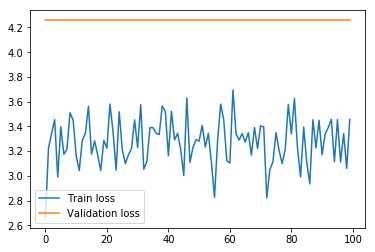

In [229]:
start = 0
plt.plot(hist.history['loss'][start:])
plt.plot(hist.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss'])

## 4. Нейросеть номер два. Автокодировщик.

Эпоха больших данных даёт нам слишком много данных. Часто хочется, чтобы их было немного поменьше, но при этом они выражали бы всю информацию о великом процессе порождения данных более ёмко. Не потерять в знании, но сэкономить! Именно из такого благородного помысла рождается метод главных компонент. Его посыл очень прост: давайте посмотрим на наши данные, найдём в них те направления, в которых происходит самое сильное изменение и оставим только их. Например, если наши данные двухмерны, то мы моги бы оставить себе только голубое направление и убрать розовое. 

<img align="center" src="http://108.61.119.12/wp-content/uploads/2014/11/gaussDist-labeled.png" height="500" width="500"> 

При этом, в плане информации мы бы не потеряли особо много. Именно так часто поступают в случае, когда размерность данных очень большая. Находят $d$ Направлений, разброс в которых покрывает $90\%$ дисперсии, а остальное забывают. 

Ещё раз, ещё раз! Если у нас есть куча выборка из карасей и щук и мы хотим научиться их отличать друг от друга, то мы могли бы оставить только информацию о чешуйках, расположенных вдоль первой, более длинной компоненты. На качество нашего классификатора это бы повлияло слабо, но мы, при этом, избавились бы от лишней размерности, от оценки лишнего коэфициента и могли бы пустить большее число наблюдений на оценку меньшего числа параметров.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/PCA_fish.png/256px-PCA_fish.png)

Главная фишка метода главных компонент состоит в том, что он делает всю эту редукцию линейно. На самом деле все новые признаки будут представлять из себя линейные комбинации из старых. 

Идею такой редукции лишней информации можно обобщить до нелинейного случая и сделать прыжок к нейросетям, которые называются **автоэнокдерами.**  Автоэнкодеры учатся оставлять минимум информации так, чтобы по этому минимуму было возможно восстановить с очень высокой точностью исходную информацию. 

Новый пример! Пусть у нас есть куча рукописных цифр и мы хотели бы научить компьютер понимать где какая цифра нарисована. Каждая цифра это картинка из пикселей размер $64 \times 64$. Всего у нас $64^2$ Наблюдаемые переменные. Это слишком много! Явно не каждый пиксель несёт в себе информацию о том какая цифра нарисована на картинке. Большая часть пикселей бесполезна. 

Чтобы отобрать самые важные нелинейные комбинации из пикселей, мы можем сделать следующее: 


![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)


Нейросеть получает на вход цифру, пытается оставить 10 самых важных нейлинейных комбинаций из пикселей, а после по этим самым важным комбинациям, она пытается восстановить цифру назад с как можно большей точностью. Ограничение на то сколько самых важных нелинейных пикселей должно остаться, заставляет нашу сетку стараться отобрать исключительно всё самое важное, что можно найти на картинке. Метод главных компонент будет частным, самым простым случаем, такой нейронной сетки. 

Первая часть автокодировщика называется **encoder**. Она пытается закодировать картинку. Вторая часть называет **decoder**. Она пытается раскодировать картинку. Идею конструирования таких сложных противоборствующих конструкций можно развить до очень крутых вещей. Например, создать две нейронные сети, одна из которых умеет отличать настоящие стулья от поддельных, а вторая умеет генерировать новые стулья, а после заставить их соревноваться. Одна сетка будет генерировать новые стулья, а другая пытаться выяснить настоящие это стулья или фэйковые. Рано или поздно первая сетка научится очень качественно генерировать новые стулья. Возможно даже такие, которых нет в природе. Такие сети впервые начали обучать совсем недавно, в 2014 году. 

Снова вернёмся ближе к делу, попробуем собрать свой автокодировщик и выделить в нашей коллекции фоточек самое важное что в них может быть. 

In [ ]:
import keras, keras.layers as L
